# Install Tools

In [ ]:
pip install transformers torch

# Import Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, ParameterGrid
from transformers import BertTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from torch.utils.data import Dataset
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
from sklearn.exceptions import UndefinedMetricWarning
import warnings
from sklearn.utils import resample
from sklearn.metrics import f1_score

# Skenario 1

Mounted at /content/drive
Label distribution in the dataset:
label
Openness             90
Agreeableness        71
Neuroticsm           45
Conscientiousness    17
Extroversion          7
Name: count, dtype: int64


<ipython-input-3-9a917322f4f1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='pastel')


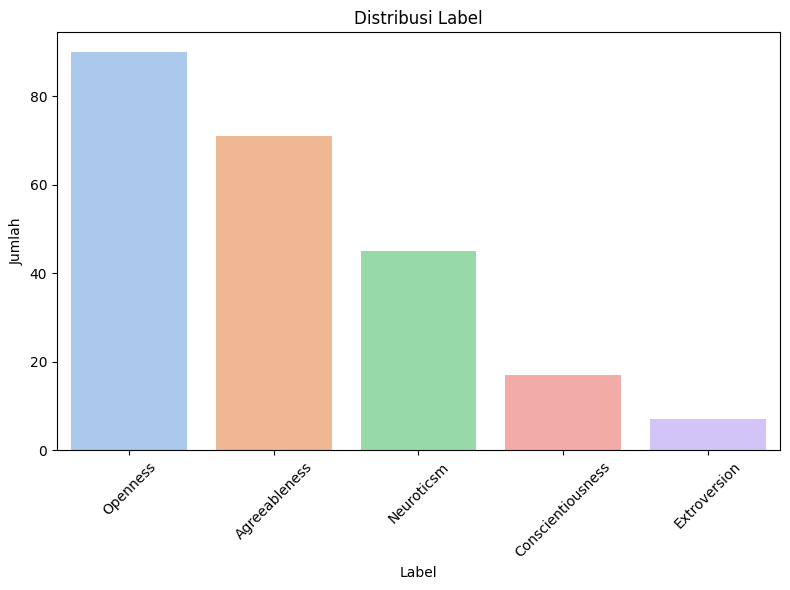

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/My Drive/Dataset TA/skenario_1_final.csv'
data = pd.read_csv(file_path)

data.head()

# Hitung distribusi label
label_distribution = data['label'].value_counts()

# Print label distribution
print("Label distribution in the dataset:")
print(label_distribution)

# Visualisasi distribusi data dalam bentuk bar chart
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='pastel')
plt.title("Distribusi Label")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Create a label mapping
label_mapping = {label: idx for idx, label in enumerate(data['label'].unique())}
data['label'] = data['label'].map(label_mapping)  # Convert string labels to integers

# Verify the label conversion
print("Label mapping:")
print(label_mapping)
print("Converted label distribution:")
print(data['label'].value_counts())

Label mapping:
{'Neuroticsm': 0, 'Agreeableness': 1, 'Openness': 2, 'Conscientiousness': 3, 'Extroversion': 4}
Converted label distribution:
label
2    90
1    71
0    45
3    17
4     7
Name: count, dtype: int64



Training data size: 184
Testing data size: 46
Training label distribution:
label
2    72
1    57
0    36
3    14
4     5
Name: count, dtype: int64

Testing label distribution:
label
2    18
1    14
0     9
3     3
4     2
Name: count, dtype: int64


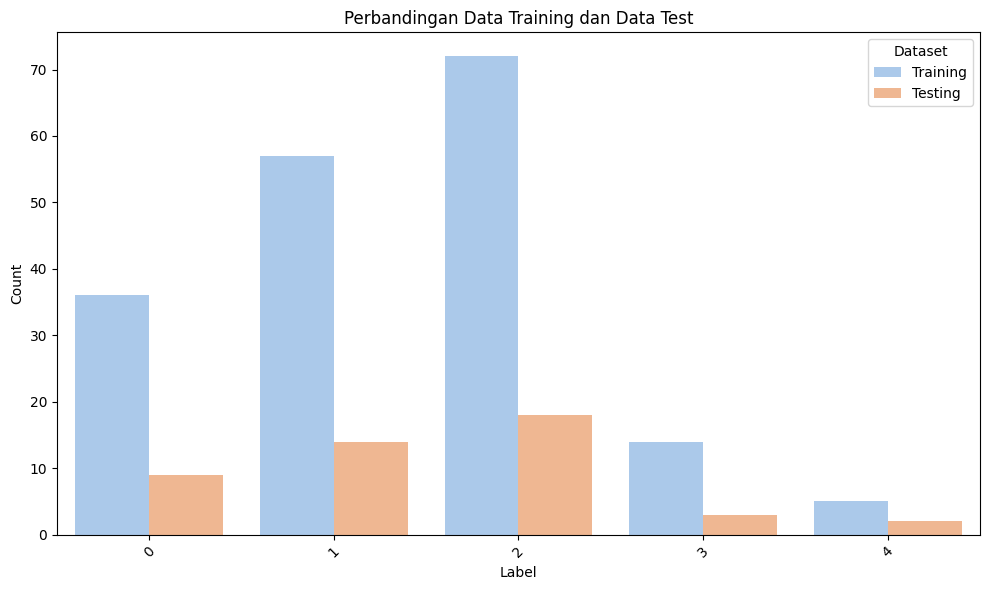

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

# Display the sizes of the training and testing sets
print(f"\nTraining data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

# Check the distribution of labels in both sets
train_label_distribution = train_data['label'].value_counts()
test_label_distribution = test_data['label'].value_counts()

print("Training label distribution:")
print(train_label_distribution)
print("\nTesting label distribution:")
print(test_label_distribution)

# Prepare data for visualization
label_names = train_label_distribution.index.union(test_label_distribution.index)
train_counts = train_label_distribution.reindex(label_names, fill_value=0)
test_counts = test_label_distribution.reindex(label_names, fill_value=0)

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Label': label_names,
    'Training': train_counts.values,
    'Testing': test_counts.values
})

# Melt the DataFrame for easier plotting
comparison_df = comparison_df.melt(id_vars='Label', var_name='Dataset', value_name='Count')

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Label', y='Count', hue='Dataset', data=comparison_df, palette='pastel')

# Set title and labels
plt.title("Perbandingan Data Training dan Data Test")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [ ]:
# Load the tokenizer for IndoBERT
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

# Prepare text data for tokenization
train_texts = train_data['processed_text'].tolist()
test_texts = test_data['processed_text'].tolist()

# Tokenization for IndoBERT
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

# Print the number of tokenized samples
print(f"Jumlah data latih IndoBERT: {len(train_encodings['input_ids'])}")
print(f"Jumlah data uji IndoBERT: {len(test_encodings['input_ids'])}")

# Display examples of tokenized data
print(f"\nContoh data latih :")
print(f"Teks Asli: {train_texts[1]}")
print(f"Token IDs: {train_encodings['input_ids'][1]}")
print(f"Attention Mask: {train_encodings['attention_mask'][1]}")

# Convert token IDs back to tokens
tokens = tokenizer.convert_ids_to_tokens(train_encodings['input_ids'][1])
print(f"Tokens: {tokens}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

Jumlah data latih IndoBERT: 184
Jumlah data uji IndoBERT: 46

Contoh data latih :
Teks Asli: relationship status ginigini butuh ruqiah aura muncul nggon nyaman enzy tertawa tertawa mengakak nomor induk siswa hesty nomor induk siswa gek dadi mbangane marai gemas petuah lari pagi have created fabulous hidup berkompetisi jalan masingmasing memaksa diburuburu semangat awokwokwok asam wee perbarui media sosial balas chat perbarui media sosial balas chat berbeda menamparmu siangsiang langkah gerakan lamban selamat malam nasi goreng sumsum ceplok mudah membuatnya fast alone far together cakap iklan kompak pawcious smile tofucorgi instagram ngalami masak ngalami sebegitunya pesan sw suaminya kakak domisili bekasi jasa semoga ayah lancarkan usaha after hearing hurtful trying henti cry soulmate friendships indeed real apa-apa apa-apa apa-apa diskualifikasi menikah notes person who being alone powerful person mengeluh dikerjain sikap profesional menjalani hidup friendly reminder rungokno ibumu ye

In [ ]:
# Create the TweetDataset class
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create datasets
train_dataset = TweetDataset(train_encodings, train_data['label'].tolist())
test_dataset = TweetDataset(test_encodings, test_data['label'].tolist())

Parameters: {'batch_size': 8, 'learning_rate': 2e-05}


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-8-78bd1d1ebf1f>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.616500,1.452095,0.391304,0.153119,0.391304,0.220109
2,1.616500,1.421026,0.304348,0.092628,0.304348,0.142029
3,1.616500,1.356753,0.413043,0.318841,0.413043,0.351007
4,1.616500,1.355734,0.391304,0.153119,0.391304,0.220109
5,1.353600,1.429454,0.282609,0.087923,0.282609,0.134119
6,1.353600,1.347449,0.521739,0.362709,0.521739,0.427924
7,1.353600,1.400369,0.434783,0.384058,0.434783,0.407121
8,1.353600,1.476504,0.413043,0.482287,0.413043,0.361506
9,1.025600,1.538970,0.391304,0.352908,0.391304,0.366113
10,1.025600,1.500223,0.434783,0.376793,0.434783,0.399042


Accuracy: 0.5217391304347826
F1 Score: 0.4279237386654266

Classification Report for Params: {'batch_size': 8, 'learning_rate': 2e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.4500    0.6429    0.5294        14
         Openness     0.5769    0.8333    0.6818        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5217        46
        macro avg     0.2054    0.2952    0.2422        46
     weighted avg     0.3627    0.5217    0.4279        46

Parameters: {'batch_size': 8, 'learning_rate': 3e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-8-78bd1d1ebf1f>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.680200,1.394457,0.391304,0.153119,0.391304,0.220109
2,1.680200,1.432288,0.282609,0.087923,0.282609,0.134119
3,1.680200,1.383630,0.391304,0.153119,0.391304,0.220109
4,1.680200,1.390466,0.391304,0.156522,0.391304,0.223602
5,1.366400,1.388799,0.304348,0.222447,0.304348,0.176092
6,1.366400,1.456689,0.413043,0.261886,0.413043,0.309303
7,1.366400,1.476271,0.456522,0.319420,0.456522,0.375733
8,1.366400,1.627250,0.413043,0.331597,0.413043,0.344444
9,1.097400,1.775380,0.413043,0.278420,0.413043,0.331294
10,1.097400,1.843076,0.391304,0.270065,0.391304,0.317076


Accuracy: 0.45652173913043476
F1 Score: 0.3757330637007078

Classification Report for Params: {'batch_size': 8, 'learning_rate': 3e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.3810    0.5714    0.4571        14
         Openness     0.5200    0.7222    0.6047        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4565        46
        macro avg     0.1802    0.2587    0.2124        46
     weighted avg     0.3194    0.4565    0.3757        46

Parameters: {'batch_size': 8, 'learning_rate': 4e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-8-78bd1d1ebf1f>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.680200,1.387196,0.391304,0.153119,0.391304,0.220109
2,1.680200,1.426015,0.304348,0.092628,0.304348,0.142029
3,1.680200,1.376083,0.391304,0.156522,0.391304,0.223602
4,1.680200,1.373153,0.391304,0.156522,0.391304,0.223602
5,1.371900,1.321321,0.478261,0.337529,0.478261,0.362225
6,1.371900,1.356673,0.456522,0.332531,0.456522,0.382844
7,1.371900,1.715202,0.413043,0.270662,0.413043,0.307063
8,1.371900,1.671946,0.456522,0.322628,0.456522,0.377502
9,1.031800,1.807137,0.391304,0.327341,0.391304,0.354152
10,1.031800,1.986732,0.391304,0.278656,0.391304,0.317609


Accuracy: 0.4782608695652174
F1 Score: 0.3622247317899492

Classification Report for Params: {'batch_size': 8, 'learning_rate': 4e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.5000    0.2857    0.3636        14
         Openness     0.4737    1.0000    0.6429        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4783        46
        macro avg     0.1947    0.2571    0.2013        46
     weighted avg     0.3375    0.4783    0.3622        46

Parameters: {'batch_size': 8, 'learning_rate': 5e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-8-78bd1d1ebf1f>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.680200,1.389723,0.391304,0.153119,0.391304,0.220109
2,1.680200,1.425887,0.304348,0.092628,0.304348,0.142029
3,1.680200,1.370701,0.391304,0.153119,0.391304,0.220109
4,1.680200,1.371359,0.391304,0.153119,0.391304,0.220109
5,1.389500,1.392323,0.304348,0.092628,0.304348,0.142029
6,1.389500,1.351223,0.413043,0.283696,0.413043,0.333696
7,1.389500,1.359003,0.391304,0.153119,0.391304,0.220109
8,1.389500,1.319814,0.456522,0.317391,0.456522,0.374448
9,1.345700,1.357836,0.521739,0.359115,0.521739,0.423503
10,1.345700,1.416132,0.521739,0.360870,0.521739,0.423188


Accuracy: 0.5217391304347826
F1 Score: 0.423502730446719

Classification Report for Params: {'batch_size': 8, 'learning_rate': 5e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.4706    0.5714    0.5161        14
         Openness     0.5517    0.8889    0.6809        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5217        46
        macro avg     0.2045    0.2921    0.2394        46
     weighted avg     0.3591    0.5217    0.4235        46

Parameters: {'batch_size': 16, 'learning_rate': 2e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-8-78bd1d1ebf1f>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.630700,1.419975,0.391304,0.153119,0.391304,0.220109
2,1.630700,1.417842,0.304348,0.092628,0.304348,0.142029
3,1.630700,1.374873,0.391304,0.153119,0.391304,0.220109
4,1.630700,1.365935,0.391304,0.153119,0.391304,0.220109
5,1.630700,1.375573,0.413043,0.460870,0.413043,0.264182
6,1.630700,1.379076,0.391304,0.153119,0.391304,0.220109
7,1.630700,1.371232,0.391304,0.153119,0.391304,0.220109
8,1.630700,1.357241,0.434783,0.344857,0.434783,0.321607
9,1.345900,1.352890,0.456522,0.422883,0.456522,0.366296
10,1.345900,1.352157,0.434783,0.417086,0.434783,0.337139


Accuracy: 0.45652173913043476
F1 Score: 0.3662961752206603

Classification Report for Params: {'batch_size': 16, 'learning_rate': 2e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.3333    0.1111    0.1667         9
    Agreeableness     0.6000    0.2143    0.3158        14
         Openness     0.4474    0.9444    0.6071        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4565        46
        macro avg     0.2761    0.2540    0.2179        46
     weighted avg     0.4229    0.4565    0.3663        46

Parameters: {'batch_size': 16, 'learning_rate': 3e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-8-78bd1d1ebf1f>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.630700,1.408564,0.391304,0.153119,0.391304,0.220109
2,1.630700,1.415676,0.304348,0.092628,0.304348,0.142029
3,1.630700,1.371624,0.434783,0.250053,0.434783,0.294663
4,1.630700,1.358802,0.434783,0.319876,0.434783,0.302415
5,1.630700,1.331914,0.500000,0.511442,0.500000,0.413203
6,1.630700,1.335672,0.434783,0.250053,0.434783,0.294663
7,1.630700,1.330163,0.521739,0.446292,0.521739,0.439343
8,1.630700,1.334828,0.434783,0.325569,0.434783,0.360167
9,1.297700,1.276516,0.500000,0.405273,0.500000,0.431786
10,1.297700,1.283723,0.478261,0.395240,0.478261,0.414641


Accuracy: 0.5217391304347826
F1 Score: 0.43934326543022195

Classification Report for Params: {'batch_size': 16, 'learning_rate': 3e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.2500    0.1111    0.1538         9
    Agreeableness     0.6250    0.3571    0.4545        14
         Openness     0.5294    1.0000    0.6923        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5217        46
        macro avg     0.2809    0.2937    0.2601        46
     weighted avg     0.4463    0.5217    0.4393        46

Parameters: {'batch_size': 16, 'learning_rate': 4e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-8-78bd1d1ebf1f>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.630700,1.402906,0.391304,0.153119,0.391304,0.220109
2,1.630700,1.417183,0.304348,0.092628,0.304348,0.142029
3,1.630700,1.382547,0.391304,0.153119,0.391304,0.220109
4,1.630700,1.375255,0.391304,0.290603,0.391304,0.314800
5,1.630700,1.358611,0.500000,0.347826,0.500000,0.402609
6,1.630700,1.349217,0.391304,0.153119,0.391304,0.220109
7,1.630700,1.300941,0.543478,0.579503,0.543478,0.457096
8,1.630700,1.354327,0.434783,0.400914,0.434783,0.384672
9,1.322800,1.305032,0.586957,0.585277,0.586957,0.538396
10,1.322800,1.341324,0.521739,0.456769,0.521739,0.476010


Accuracy: 0.5869565217391305
F1 Score: 0.5383963862224731

Classification Report for Params: {'batch_size': 16, 'learning_rate': 4e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.6000    0.3333    0.4286         9
    Agreeableness     0.8750    0.5000    0.6364        14
         Openness     0.5152    0.9444    0.6667        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5870        46
        macro avg     0.3980    0.3556    0.3463        46
     weighted avg     0.5853    0.5870    0.5384        46

Parameters: {'batch_size': 16, 'learning_rate': 5e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-8-78bd1d1ebf1f>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.630700,1.403267,0.391304,0.153119,0.391304,0.220109
2,1.630700,1.406367,0.304348,0.092628,0.304348,0.142029
3,1.630700,1.372601,0.391304,0.153119,0.391304,0.220109
4,1.630700,1.374013,0.391304,0.153119,0.391304,0.220109
5,1.630700,1.318487,0.413043,0.355237,0.413043,0.371316
6,1.630700,1.307882,0.478261,0.327718,0.478261,0.387216
7,1.630700,1.766649,0.304348,0.295452,0.304348,0.288640
8,1.630700,1.436330,0.500000,0.442276,0.500000,0.452451
9,1.278900,1.505583,0.478261,0.524317,0.478261,0.420361
10,1.278900,1.589833,0.456522,0.428882,0.456522,0.429906


Accuracy: 0.5
F1 Score: 0.45245090536848265

Classification Report for Params: {'batch_size': 16, 'learning_rate': 5e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.5000    0.2222    0.3077         9
    Agreeableness     0.4118    0.5000    0.4516        14
         Openness     0.5600    0.7778    0.6512        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5000        46
        macro avg     0.2944    0.3000    0.2821        46
     weighted avg     0.4423    0.5000    0.4525        46



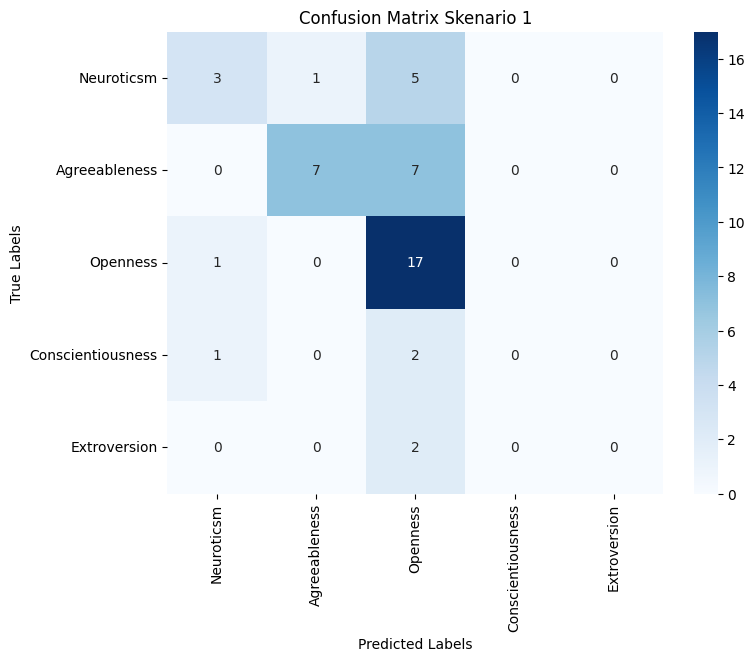


Classification Report Skenario 1:
                   precision    recall  f1-score   support

       Neuroticsm     0.6000    0.3333    0.4286         9
    Agreeableness     0.8750    0.5000    0.6364        14
         Openness     0.5152    0.9444    0.6667        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5870        46
        macro avg     0.3980    0.3556    0.3463        46
     weighted avg     0.5853    0.5870    0.5384        46

Best Model | Params: {'batch_size': 16, 'learning_rate': 4e-05} | Accuracy: 0.5869565217391305 | F1 Score: 0.5383963862224731

Results Table:
   learning_rate  batch_size  accuracy  f1_score
0        0.00002           8  0.521739  0.427924
1        0.00003           8  0.456522  0.375733
2        0.00004           8  0.478261  0.362225
3        0.00005           8  0.521739  0.423503
4        0.00002          16  0.456522  0.36

In [ ]:
# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Define test_labels for evaluation
test_labels = test_data['label'].tolist()
model_name = "indobenchmark/indobert-base-p1"

# Initialize variables for best model
best_accuracy_indobert_scenario1 = 0
best_f1_indobert_scenario1 = 0
best_model_indobert_scenario1 = None
best_params_indobert_scenario1 = None

# Create a list to store results
results = []

# Grid Hyperparameters
param_grid = {
    'learning_rate': [2e-5, 3e-5, 4e-5, 5e-5],
    'batch_size': [8, 16]
}

# Loop parameter grid
for params in ParameterGrid(param_grid):
    print(f"Parameters: {params}")

    # Initialize model
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, num_labels=len(np.unique(test_labels))
    )

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f"./results/{model_name}",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=params['learning_rate'],
        per_device_train_batch_size=params['batch_size'],
        per_device_eval_batch_size=params['batch_size'],
        num_train_epochs=10,
        weight_decay=0.01,
        logging_dir=f"./logs/{model_name}",
        logging_steps=100,
        save_total_limit=2,
        fp16=True,
        report_to="none",
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        greater_is_better=True,
        logging_first_step=True,
        gradient_accumulation_steps=1
    )

    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
        compute_metrics=lambda p: {
            "accuracy": accuracy_score(p.label_ids, np.argmax(p.predictions, axis=1)),
            "precision": precision_recall_fscore_support(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')[0],
            "recall": precision_recall_fscore_support(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')[1],
            "f1": precision_recall_fscore_support(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')[2]
        }
    )

    # Train model
    trainer.train()

    # Evaluate model
    predictions = trainer.predict(test_dataset)
    predicted_labels = np.argmax(predictions.predictions, axis=1)

    accuracy = accuracy_score(test_labels, predicted_labels)
    f1 = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')[2]

    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"\nClassification Report for Params: {params}")
    print(classification_report(test_labels, predicted_labels, target_names=list(label_mapping.keys()), digits=4))

    # Store results
    results.append({
        'learning_rate': params['learning_rate'],
        'batch_size': params['batch_size'],
        'accuracy': accuracy,
        'f1_score': f1
    })

    # Update best model based on accuracy and F1 score
    if accuracy > best_accuracy_indobert_scenario1:
        best_accuracy_indobert_scenario1 = accuracy
        best_f1_indobert_scenario1 = f1
        best_model_indobert_scenario1 = model
        best_params_indobert_scenario1 = params
        best_predicted_labels_indobert_scenario1 = predicted_labels

# Confusion Matrix and Evaluation of Best Model
cm = confusion_matrix(test_labels, best_predicted_labels_indobert_scenario1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix Skenario 1")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("\nClassification Report Skenario 1:")
print(classification_report(test_labels, best_predicted_labels_indobert_scenario1, target_names=list(label_mapping.keys()), digits=4))

print(f"Best Model | Params: {best_params_indobert_scenario1} | Accuracy: {best_accuracy_indobert_scenario1} | F1 Score: {best_f1_indobert_scenario1}")

# Create a DataFrame from results
results_indobert_scenario1 = pd.DataFrame(results)

# Display the results table
print("\nResults Table:")
print(results_indobert_scenario1)

# Skenario 2

In [ ]:
# Load dataset
file_path = '/content/drive/My Drive/Dataset TA/skenario_2_final.csv'
data = pd.read_csv(file_path)

In [ ]:
# Create a label mapping
label_mapping = {label: idx for idx, label in enumerate(data['label'].unique())}
data['label'] = data['label'].map(label_mapping)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

# Load the tokenizer for IndoBERT
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

# Prepare text data for tokenization
train_texts = train_data['processed_text'].tolist()
test_texts = test_data['processed_text'].tolist()

# Tokenization for IndoBERT
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

In [ ]:
# Create the TweetDataset class
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])  # This should now be an integer
        return item

# Create datasets
train_dataset = TweetDataset(train_encodings, train_data['label'].tolist())
test_dataset = TweetDataset(test_encodings, test_data['label'].tolist())

Parameters: {'batch_size': 8, 'learning_rate': 2e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-e6ad68d336f1>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.683100,1.413489,0.391304,0.153119,0.391304,0.220109
2,1.683100,1.439230,0.282609,0.087923,0.282609,0.134119
3,1.683100,1.389171,0.391304,0.153119,0.391304,0.220109
4,1.683100,1.373663,0.391304,0.156522,0.391304,0.223602
5,1.361100,1.417586,0.282609,0.087923,0.282609,0.134119
6,1.361100,1.340449,0.521739,0.363768,0.521739,0.424100
7,1.361100,1.396458,0.434783,0.310000,0.434783,0.361922
8,1.361100,1.485628,0.434783,0.302174,0.434783,0.356545
9,1.139400,1.522705,0.413043,0.289855,0.413043,0.340217
10,1.139400,1.547982,0.434783,0.303069,0.434783,0.355997


Accuracy: 0.5217391304347826
F1 Score: 0.42410044977511246

Classification Report for Params: {'batch_size': 8, 'learning_rate': 2e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.4667    0.5000    0.4828        14
         Openness     0.5667    0.9444    0.7083        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5217        46
        macro avg     0.2067    0.2889    0.2382        46
     weighted avg     0.3638    0.5217    0.4241        46

Parameters: {'batch_size': 8, 'learning_rate': 3e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-e6ad68d336f1>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.683100,1.394850,0.391304,0.153119,0.391304,0.220109
2,1.683100,1.433339,0.282609,0.087923,0.282609,0.134119
3,1.683100,1.382292,0.391304,0.153119,0.391304,0.220109
4,1.683100,1.405305,0.391304,0.156522,0.391304,0.223602
5,1.363300,1.390938,0.434783,0.285592,0.434783,0.334448
6,1.363300,1.393300,0.456522,0.327899,0.456522,0.381366
7,1.363300,1.472080,0.391304,0.271906,0.391304,0.320856
8,1.363300,1.709197,0.304348,0.300395,0.304348,0.277861
9,1.081700,1.857471,0.413043,0.297101,0.413043,0.345356
10,1.081700,1.916946,0.413043,0.303069,0.413043,0.349037


Accuracy: 0.45652173913043476
F1 Score: 0.3813664596273291

Classification Report for Params: {'batch_size': 8, 'learning_rate': 3e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.3810    0.5714    0.4571        14
         Openness     0.5417    0.7222    0.6190        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4565        46
        macro avg     0.1845    0.2587    0.2152        46
     weighted avg     0.3279    0.4565    0.3814        46

Parameters: {'batch_size': 8, 'learning_rate': 4e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-e6ad68d336f1>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.683100,1.393321,0.391304,0.153119,0.391304,0.220109
2,1.683100,1.422140,0.304348,0.092628,0.304348,0.142029
3,1.683100,1.372442,0.391304,0.153119,0.391304,0.220109
4,1.683100,1.430537,0.391304,0.153119,0.391304,0.220109
5,1.382200,1.378312,0.391304,0.286804,0.391304,0.323980
6,1.382200,1.467710,0.391304,0.271906,0.391304,0.320856
7,1.382200,1.598153,0.456522,0.319420,0.456522,0.375733
8,1.382200,2.125233,0.347826,0.267237,0.347826,0.302195
9,1.032600,2.112684,0.347826,0.310897,0.347826,0.319937
10,1.032600,2.164114,0.391304,0.339027,0.391304,0.343135


Accuracy: 0.45652173913043476
F1 Score: 0.3757330637007078

Classification Report for Params: {'batch_size': 8, 'learning_rate': 4e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.3810    0.5714    0.4571        14
         Openness     0.5200    0.7222    0.6047        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4565        46
        macro avg     0.1802    0.2587    0.2124        46
     weighted avg     0.3194    0.4565    0.3757        46

Parameters: {'batch_size': 8, 'learning_rate': 5e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-e6ad68d336f1>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.683100,1.387228,0.391304,0.153119,0.391304,0.220109
2,1.683100,1.430643,0.304348,0.092628,0.304348,0.142029
3,1.683100,1.375435,0.391304,0.153119,0.391304,0.220109
4,1.683100,1.373036,0.391304,0.153119,0.391304,0.220109
5,1.390000,1.389840,0.304348,0.092628,0.304348,0.142029
6,1.390000,1.374745,0.391304,0.153119,0.391304,0.220109
7,1.390000,1.344387,0.391304,0.153119,0.391304,0.220109
8,1.390000,1.331416,0.478261,0.333913,0.478261,0.393124
9,1.327000,1.521283,0.434783,0.276087,0.434783,0.322464
10,1.327000,1.545219,0.391304,0.263768,0.391304,0.312219


Accuracy: 0.4782608695652174
F1 Score: 0.3931243680485339

Classification Report for Params: {'batch_size': 8, 'learning_rate': 5e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.4286    0.6429    0.5143        14
         Openness     0.5200    0.7222    0.6047        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4783        46
        macro avg     0.1897    0.2730    0.2238        46
     weighted avg     0.3339    0.4783    0.3931        46

Parameters: {'batch_size': 16, 'learning_rate': 2e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-e6ad68d336f1>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.639700,1.417608,0.391304,0.153119,0.391304,0.220109
2,1.639700,1.419264,0.304348,0.092628,0.304348,0.142029
3,1.639700,1.376136,0.391304,0.153119,0.391304,0.220109
4,1.639700,1.370669,0.391304,0.153119,0.391304,0.220109
5,1.639700,1.383524,0.413043,0.265251,0.413043,0.266739
6,1.639700,1.378779,0.413043,0.460870,0.413043,0.264182
7,1.639700,1.418075,0.391304,0.156522,0.391304,0.223602
8,1.639700,1.365012,0.456522,0.347826,0.456522,0.384058
9,1.337600,1.400539,0.369565,0.304878,0.369565,0.250276
10,1.337600,1.358557,0.456522,0.331056,0.456522,0.363071


Accuracy: 0.45652173913043476
F1 Score: 0.3840579710144927

Classification Report for Params: {'batch_size': 16, 'learning_rate': 2e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.3571    0.7143    0.4762        14
         Openness     0.6111    0.6111    0.6111        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4565        46
        macro avg     0.1937    0.2651    0.2175        46
     weighted avg     0.3478    0.4565    0.3841        46

Parameters: {'batch_size': 16, 'learning_rate': 3e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-e6ad68d336f1>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.639700,1.410921,0.391304,0.153119,0.391304,0.220109
2,1.639700,1.426535,0.304348,0.092628,0.304348,0.142029
3,1.639700,1.384023,0.391304,0.156522,0.391304,0.223602
4,1.639700,1.380944,0.413043,0.312253,0.413043,0.265252
5,1.639700,1.399977,0.282609,0.087923,0.282609,0.134119
6,1.639700,1.389829,0.391304,0.156522,0.391304,0.223602
7,1.639700,1.397747,0.413043,0.369203,0.413043,0.300997
8,1.639700,1.449691,0.347826,0.217391,0.347826,0.266667
9,1.313100,1.410655,0.391304,0.307399,0.391304,0.339662
10,1.313100,1.429380,0.413043,0.334239,0.413043,0.350587


Accuracy: 0.41304347826086957
F1 Score: 0.26525245441795237

Classification Report for Params: {'batch_size': 16, 'learning_rate': 3e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.5000    0.0714    0.1250        14
         Openness     0.4091    1.0000    0.5806        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4130        46
        macro avg     0.1818    0.2143    0.1411        46
     weighted avg     0.3123    0.4130    0.2653        46

Parameters: {'batch_size': 16, 'learning_rate': 4e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-e6ad68d336f1>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.639700,1.404212,0.391304,0.153119,0.391304,0.220109
2,1.639700,1.428117,0.304348,0.092628,0.304348,0.142029
3,1.639700,1.384076,0.391304,0.153119,0.391304,0.220109
4,1.639700,1.375955,0.391304,0.274443,0.391304,0.276306
5,1.639700,1.365266,0.543478,0.394918,0.543478,0.436226
6,1.639700,1.360713,0.391304,0.234472,0.391304,0.255556
7,1.639700,1.353930,0.478261,0.328402,0.478261,0.372765
8,1.639700,1.390434,0.521739,0.378466,0.521739,0.429327
9,1.310400,1.441666,0.347826,0.289510,0.347826,0.315844
10,1.310400,1.401203,0.478261,0.352926,0.478261,0.393256


Accuracy: 0.5434782608695652
F1 Score: 0.4362264150943396

Classification Report for Params: {'batch_size': 16, 'learning_rate': 4e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.6364    0.5000    0.5600        14
         Openness     0.5143    1.0000    0.6792        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5435        46
        macro avg     0.2301    0.3000    0.2478        46
     weighted avg     0.3949    0.5435    0.4362        46

Parameters: {'batch_size': 16, 'learning_rate': 5e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-e6ad68d336f1>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.639700,1.400688,0.391304,0.153119,0.391304,0.220109
2,1.639700,1.425601,0.304348,0.092628,0.304348,0.142029
3,1.639700,1.375350,0.391304,0.153119,0.391304,0.220109
4,1.639700,1.367496,0.391304,0.153119,0.391304,0.220109
5,1.639700,1.387695,0.304348,0.092628,0.304348,0.142029
6,1.639700,1.359237,0.391304,0.153119,0.391304,0.220109
7,1.639700,1.474556,0.304348,0.196931,0.304348,0.238796
8,1.639700,1.390598,0.478261,0.344110,0.478261,0.399951
9,1.326300,1.457047,0.434783,0.333261,0.434783,0.376542
10,1.326300,1.450333,0.434783,0.355072,0.434783,0.383946


Accuracy: 0.4782608695652174
F1 Score: 0.3999505928853755

Classification Report for Params: {'batch_size': 16, 'learning_rate': 5e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.3889    0.5000    0.4375        14
         Openness     0.5769    0.8333    0.6818        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4783        46
        macro avg     0.1932    0.2667    0.2239        46
     weighted avg     0.3441    0.4783    0.4000        46



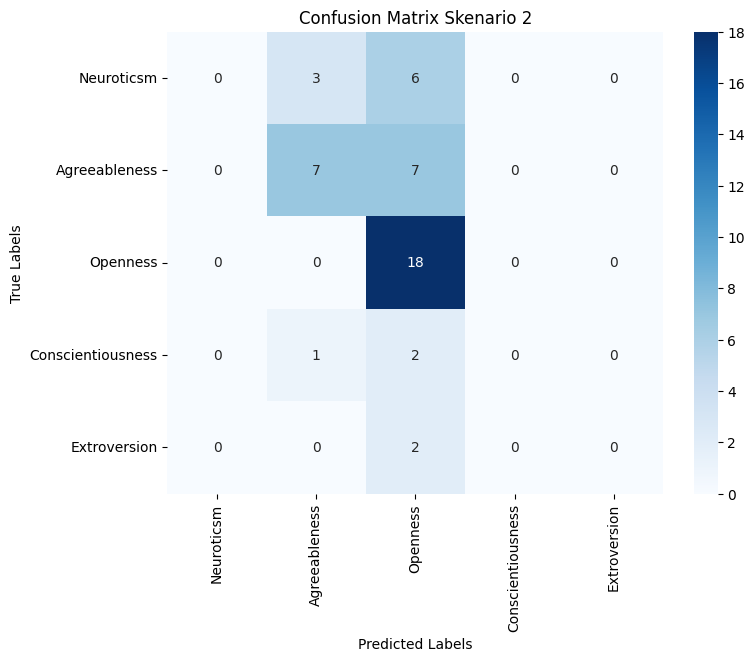


Classification Report Skenario 2:
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.6364    0.5000    0.5600        14
         Openness     0.5143    1.0000    0.6792        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5435        46
        macro avg     0.2301    0.3000    0.2478        46
     weighted avg     0.3949    0.5435    0.4362        46

Best Model | Params: {'batch_size': 16, 'learning_rate': 4e-05} | Accuracy: 0.5434782608695652 | F1 Score: 0.4362264150943396

Results Table:
   learning_rate  batch_size  accuracy  f1_score
0        0.00002           8  0.521739  0.424100
1        0.00003           8  0.456522  0.381366
2        0.00004           8  0.456522  0.375733
3        0.00005           8  0.478261  0.393124
4        0.00002          16  0.456522  0.38

In [ ]:
# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Define test_labels for evaluation
test_labels = test_data['label'].tolist()
model_name = "indobenchmark/indobert-base-p1"

# Initialize variables for best model
best_accuracy_indobert_scenario2 = 0
best_f1_indobert_scenario2 = 0
best_model_indobert_scenario2 = None
best_params_indobert_scenario2 = None

# Create a list to store results
results = []

# Grid Hyperparameters
param_grid = {
    'learning_rate': [2e-5, 3e-5, 4e-5, 5e-5],
    'batch_size': [8, 16]
}

# Loop parameter grid
for params in ParameterGrid(param_grid):
    print(f"Parameters: {params}")

    # Initialize model
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, num_labels=len(np.unique(test_labels))
    )

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f"./results/{model_name}",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=params['learning_rate'],
        per_device_train_batch_size=params['batch_size'],
        per_device_eval_batch_size=params['batch_size'],
        num_train_epochs=10,
        weight_decay=0.01,
        logging_dir=f"./logs/{model_name}",
        logging_steps=100,
        save_total_limit=2,
        fp16=True,
        report_to="none",
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        greater_is_better=True,
        logging_first_step=True,
        gradient_accumulation_steps=1
    )

    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
        compute_metrics=lambda p: {
            "accuracy": accuracy_score(p.label_ids, np.argmax(p.predictions, axis=1)),
            "precision": precision_recall_fscore_support(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')[0],
            "recall": precision_recall_fscore_support(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')[1],
            "f1": precision_recall_fscore_support(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')[2]
        }
    )

    # Train model
    trainer.train()

    # Evaluate model
    predictions = trainer.predict(test_dataset)
    predicted_labels = np.argmax(predictions.predictions, axis=1)

    accuracy = accuracy_score(test_labels, predicted_labels)
    f1 = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')[2]

    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"\nClassification Report for Params: {params}")
    print(classification_report(test_labels, predicted_labels, target_names=list(label_mapping.keys()), digits=4))

    # Store results
    results.append({
        'learning_rate': params['learning_rate'],
        'batch_size': params['batch_size'],
        'accuracy': accuracy,
        'f1_score': f1
    })

    # Update best model based on accuracy and F1 score
    if accuracy > best_accuracy_indobert_scenario2:
        best_accuracy_indobert_scenario2 = accuracy
        best_f1_indobert_scenario2 = f1
        best_model_indobert_scenario2 = model
        best_params_indobert_scenario2 = params
        best_predicted_labels_indobert_scenario2 = predicted_labels

# Confusion Matrix and Evaluation of Best Model
cm = confusion_matrix(test_labels, best_predicted_labels_indobert_scenario2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix Skenario 2")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("\nClassification Report Skenario 2:")
print(classification_report(test_labels, best_predicted_labels_indobert_scenario2, target_names=list(label_mapping.keys()), digits=4))

print(f"Best Model | Params: {best_params_indobert_scenario2} | Accuracy: {best_accuracy_indobert_scenario2} | F1 Score: {best_f1_indobert_scenario2}")

# Create a DataFrame from results
results_indobert_scenario2 = pd.DataFrame(results)

# Display the results table
print("\nResults Table:")
print(results_indobert_scenario2)


# Skenario 1 Upsample

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Label distribution in the dataset:
label
Openness             90
Agreeableness        71
Neuroticsm           45
Conscientiousness    17
Extroversion          7
Name: count, dtype: int64


<ipython-input-39-9a917322f4f1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='pastel')


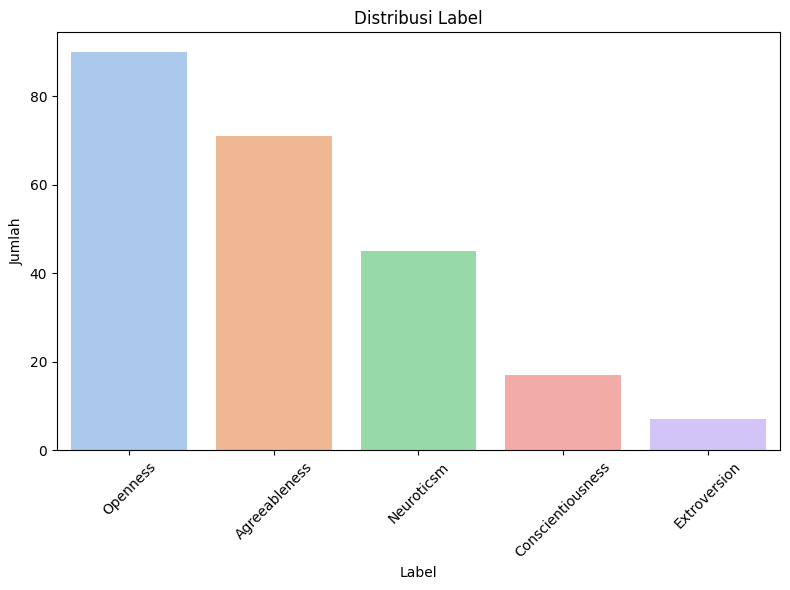

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/My Drive/Dataset TA/skenario_1_final.csv'
data = pd.read_csv(file_path)

data.head()

# Hitung distribusi label
label_distribution = data['label'].value_counts()

# Print label distribution
print("Label distribution in the dataset:")
print(label_distribution)

# Visualisasi distribusi data dalam bentuk bar chart
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='pastel')
plt.title("Distribusi Label")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Create a label mapping
label_mapping = {label: idx for idx, label in enumerate(data['label'].unique())}
data['label'] = data['label'].map(label_mapping)
# Verify the label conversion
print("Label mapping:")
print(label_mapping)
print("Converted label distribution:")
print(data['label'].value_counts())

Label mapping:
{'Neuroticsm': 0, 'Agreeableness': 1, 'Openness': 2, 'Conscientiousness': 3, 'Extroversion': 4}
Converted label distribution:
label
2    90
1    71
0    45
3    17
4     7
Name: count, dtype: int64



Distribusi label sebelum upsampling (Train):
label
2    72
1    57
0    36
3    14
4     5
Name: count, dtype: int64

Distribusi label sebelum upsampling (Test):
label
2    18
1    14
0     9
3     3
4     2
Name: count, dtype: int64

Distribusi label setelah upsampling (Train):
label
0    72
1    72
2    72
3    72
4    72
Name: count, dtype: int64

Distribusi label (Test tetap sama, tidak di-upsample):
label
2    18
1    14
0     9
3     3
4     2
Name: count, dtype: int64


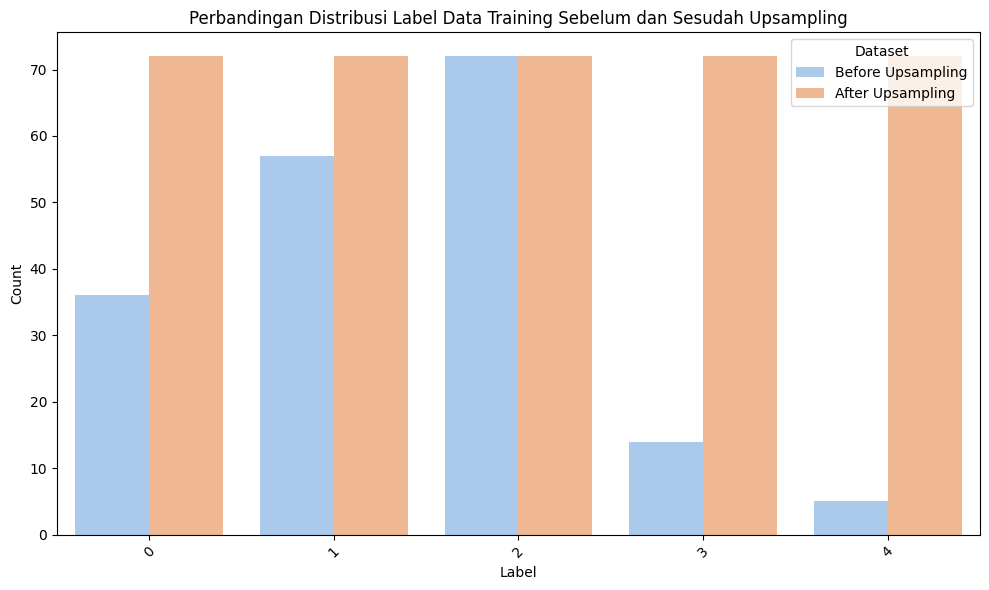

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

# Print initial distribution of train and test data
print("\nDistribusi label sebelum upsampling (Train):")
print(train_data['label'].value_counts())

print("\nDistribusi label sebelum upsampling (Test):")
print(test_data['label'].value_counts())

# Upsample training data
train_data_upsampled = pd.concat([
    resample(group, replace=True, n_samples=train_data['label'].value_counts().max(), random_state=42)
    for label, group in train_data.groupby('label')
])

# Print distribution after upsampling
print("\nDistribusi label setelah upsampling (Train):")
print(train_data_upsampled['label'].value_counts())

print("\nDistribusi label (Test tetap sama, tidak di-upsample):")
print(test_data['label'].value_counts())

# Prepare data for visualization
before_upsampling = train_data['label'].value_counts().sort_index()
after_upsampling = train_data_upsampled['label'].value_counts().sort_index()

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Label': before_upsampling.index,
    'Before Upsampling': before_upsampling.values,
    'After Upsampling': after_upsampling.values
})

# Melt the DataFrame for easier plotting
comparison_df = comparison_df.melt(id_vars='Label', var_name='Dataset', value_name='Count')

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Label', y='Count', hue='Dataset', data=comparison_df, palette='pastel')

# Set title and labels
plt.title("Perbandingan Distribusi Label Data Training Sebelum dan Sesudah Upsampling")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Load the tokenizer for IndoBERT
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

# Prepare text data for tokenization
train_texts = train_data_upsampled['processed_text'].tolist()
test_texts = test_data['processed_text'].tolist()

# Tokenization for IndoBERT
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

# Print the number of tokenized samples
print(f"Jumlah data latih IndoBERT: {len(train_encodings['input_ids'])}")
print(f"Jumlah data uji IndoBERT: {len(test_encodings['input_ids'])}")

# Display examples of tokenized data
print(f"\nContoh data latih :")
print(f"Teks Asli: {train_texts[1]}")
print(f"Token IDs: {train_encodings['input_ids'][1]}")
print(f"Attention Mask: {train_encodings['attention_mask'][1]}")

# Convert token IDs back to tokens
tokens = tokenizer.convert_ids_to_tokens(train_encodings['input_ids'][1])
print(f"Tokens: {tokens}")

# Convert train and test data into separate lists for training and testing
train_labels = train_data_upsampled['label'].tolist()
test_labels = test_data['label'].tolist()

# Optional: Print the first few entries of the processed data
print("\nContoh data latih setelah tokenisasi:")
print(train_encodings['input_ids'][:2])

Jumlah data latih IndoBERT: 360
Jumlah data uji IndoBERT: 46

Contoh data latih :
Teks Asli: tolak legalitas minuman keras saynotomiras sayamenolaklegalitasmiras miraspangkalsejutamaksia kroscek tagihan berobat mundur astagfirullahaladziim newprofilepic kingdomofsiroh btswithkingshifrun ayo warga twitter kelas pastpresentfuture tautan pendaftaran tertanda raja bahagia tergabung circle kerajaan siroh bertemu teman saleh sholehah mvmaknabahagia engkau kemuliaan carilah sahabat orangorang takut allah imam syafii mvmaknabahagia yntv thyn ynentertainment ready second run emot ombak abang hawa pinjam mukanya mvmaknabahagia yntv thyn ynentertainment abang hawa arah pertanda teori emotbingung emotnangis emot mengakak stream xkwavers debutynentertainment xschool xkwavers maknabahagia thnyn yntv yukngajitv bahagia ombak tim yagak geng emot ombak semangat lupa bahagia mvmaknabahagia yntv thyn ynentertainment terfavorit video musik makna bahagia mvmaknabahagia yntv thyn ynentertainment mvmaknabaha

In [ ]:
# Create the TweetDataset class
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])  # This should now be an integer
        return item

# Create datasets
train_dataset = TweetDataset(train_encodings, train_data['label'].tolist())
test_dataset = TweetDataset(test_encodings, test_data['label'].tolist())

Parameters: {'batch_size': 8, 'learning_rate': 2e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-44-7baf3da8a60a>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.650400,1.432766,0.391304,0.153119,0.391304,0.220109
2,1.650400,1.439782,0.282609,0.215369,0.282609,0.165414
3,1.650400,1.399000,0.369565,0.151186,0.369565,0.214586
4,1.650400,1.380307,0.456522,0.309783,0.456522,0.366304
5,1.307400,1.407651,0.347826,0.388587,0.347826,0.307650
6,1.307400,1.527521,0.369565,0.147826,0.369565,0.211180
7,1.307400,1.396474,0.369565,0.337607,0.369565,0.341038
8,1.307400,1.405252,0.456522,0.379831,0.456522,0.405877
9,0.957900,1.490205,0.304348,0.282484,0.304348,0.256236
10,0.957900,1.448115,0.347826,0.325428,0.347826,0.317391


Accuracy: 0.45652173913043476
F1 Score: 0.366304347826087

Classification Report for Params: {'batch_size': 8, 'learning_rate': 2e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.3750    0.4286    0.4000        14
         Openness     0.5000    0.8333    0.6250        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4565        46
        macro avg     0.1750    0.2524    0.2050        46
     weighted avg     0.3098    0.4565    0.3663        46

Parameters: {'batch_size': 8, 'learning_rate': 3e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-44-7baf3da8a60a>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.654300,1.407662,0.391304,0.153119,0.391304,0.220109
2,1.654300,1.409222,0.304348,0.222447,0.304348,0.176092
3,1.654300,1.359396,0.413043,0.310559,0.413043,0.289372
4,1.654300,1.435568,0.413043,0.460870,0.413043,0.264182
5,1.349600,1.342190,0.456522,0.316943,0.456522,0.373346
6,1.349600,1.486272,0.500000,0.382687,0.500000,0.400687
7,1.349600,1.344642,0.456522,0.322483,0.456522,0.362542
8,1.349600,1.426556,0.500000,0.393582,0.500000,0.413785
9,1.018200,1.443487,0.434783,0.515528,0.434783,0.371295
10,1.018200,1.397007,0.391304,0.298279,0.391304,0.338443


Accuracy: 0.5
F1 Score: 0.4006874033339061

Classification Report for Params: {'batch_size': 8, 'learning_rate': 3e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.6667    0.4286    0.5217        14
         Openness     0.4595    0.9444    0.6182        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5000        46
        macro avg     0.2252    0.2746    0.2280        46
     weighted avg     0.3827    0.5000    0.4007        46

Parameters: {'batch_size': 8, 'learning_rate': 4e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-44-7baf3da8a60a>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.654300,1.405550,0.391304,0.153119,0.391304,0.220109
2,1.654300,1.382547,0.304348,0.092628,0.304348,0.142029
3,1.654300,1.399457,0.391304,0.153119,0.391304,0.220109
4,1.654300,1.430532,0.391304,0.153119,0.391304,0.220109
5,1.376600,1.402307,0.456522,0.360697,0.456522,0.370326
6,1.376600,1.384633,0.434783,0.326508,0.434783,0.352042
7,1.376600,1.389632,0.434783,0.344629,0.434783,0.347464
8,1.376600,1.487920,0.413043,0.326482,0.413043,0.323410
9,1.112400,1.452164,0.478261,0.336538,0.478261,0.393184
10,1.112400,1.474944,0.456522,0.355487,0.456522,0.375494


Accuracy: 0.4782608695652174
F1 Score: 0.3931843275342425

Classification Report for Params: {'batch_size': 8, 'learning_rate': 4e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.5294    0.6429    0.5806        14
         Openness     0.4483    0.7222    0.5532        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4783        46
        macro avg     0.1955    0.2730    0.2268        46
     weighted avg     0.3365    0.4783    0.3932        46

Parameters: {'batch_size': 8, 'learning_rate': 5e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-44-7baf3da8a60a>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.654300,1.402599,0.391304,0.153119,0.391304,0.220109
2,1.654300,1.396622,0.304348,0.092628,0.304348,0.142029
3,1.654300,1.409827,0.391304,0.153119,0.391304,0.220109
4,1.654300,1.395412,0.391304,0.153119,0.391304,0.220109
5,1.387200,1.415559,0.369565,0.394928,0.369565,0.258893
6,1.387200,1.504766,0.369565,0.394928,0.369565,0.258893
7,1.387200,1.376544,0.456522,0.336957,0.456522,0.376812
8,1.387200,1.395524,0.478261,0.338882,0.478261,0.392419
9,1.127900,1.405263,0.478261,0.334783,0.478261,0.390580
10,1.127900,1.407317,0.478261,0.333992,0.478261,0.392685


Accuracy: 0.4782608695652174
F1 Score: 0.39241917502787066

Classification Report for Params: {'batch_size': 8, 'learning_rate': 5e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.4400    0.7857    0.5641        14
         Openness     0.5238    0.6111    0.5641        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4783        46
        macro avg     0.1928    0.2794    0.2256        46
     weighted avg     0.3389    0.4783    0.3924        46

Parameters: {'batch_size': 16, 'learning_rate': 2e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-44-7baf3da8a60a>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.604100,1.421047,0.391304,0.153119,0.391304,0.220109
2,1.604100,1.410305,0.304348,0.092628,0.304348,0.142029
3,1.604100,1.378556,0.391304,0.153119,0.391304,0.220109
4,1.604100,1.372463,0.413043,0.312253,0.413043,0.265252
5,1.604100,1.429475,0.195652,0.480179,0.195652,0.158804
6,1.604100,1.414052,0.413043,0.460870,0.413043,0.264182
7,1.604100,1.386613,0.369565,0.249510,0.369565,0.278605
8,1.604100,1.383386,0.413043,0.283987,0.413043,0.289571
9,1.301500,1.379564,0.391304,0.270652,0.391304,0.317391
10,1.301500,1.377410,0.413043,0.289402,0.413043,0.333913


Accuracy: 0.41304347826086957
F1 Score: 0.26525245441795237

Classification Report for Params: {'batch_size': 16, 'learning_rate': 2e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.5000    0.0714    0.1250        14
         Openness     0.4091    1.0000    0.5806        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4130        46
        macro avg     0.1818    0.2143    0.1411        46
     weighted avg     0.3123    0.4130    0.2653        46

Parameters: {'batch_size': 16, 'learning_rate': 3e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-44-7baf3da8a60a>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.604100,1.396644,0.391304,0.153119,0.391304,0.220109
2,1.604100,1.384182,0.304348,0.092628,0.304348,0.142029
3,1.604100,1.371380,0.391304,0.153119,0.391304,0.220109
4,1.604100,1.378397,0.413043,0.460870,0.413043,0.264182
5,1.604100,1.448306,0.326087,0.485990,0.326087,0.185626
6,1.604100,1.396814,0.413043,0.265251,0.413043,0.266739
7,1.604100,1.423637,0.434783,0.322742,0.434783,0.324714
8,1.604100,1.476308,0.434783,0.338758,0.434783,0.339455
9,1.266000,1.470501,0.369565,0.257971,0.369565,0.300600
10,1.266000,1.483208,0.391304,0.280691,0.391304,0.315942


Accuracy: 0.43478260869565216
F1 Score: 0.32471395881006865

Classification Report for Params: {'batch_size': 16, 'learning_rate': 3e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.5000    0.2143    0.3000        14
         Openness     0.4359    0.9444    0.5965        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4348        46
        macro avg     0.1872    0.2317    0.1793        46
     weighted avg     0.3227    0.4348    0.3247        46

Parameters: {'batch_size': 16, 'learning_rate': 4e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-44-7baf3da8a60a>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.604100,1.385986,0.391304,0.153119,0.391304,0.220109
2,1.604100,1.391209,0.304348,0.092628,0.304348,0.142029
3,1.604100,1.373599,0.391304,0.153119,0.391304,0.220109
4,1.604100,1.378322,0.413043,0.460870,0.413043,0.264182
5,1.604100,1.417396,0.326087,0.292490,0.326087,0.186057
6,1.604100,1.430441,0.413043,0.312253,0.413043,0.265252
7,1.604100,1.392504,0.413043,0.293698,0.413043,0.343215
8,1.604100,1.553891,0.282609,0.343296,0.282609,0.240666
9,1.264900,1.575142,0.304348,0.221889,0.304348,0.253469
10,1.264900,1.527503,0.326087,0.258517,0.326087,0.281382


Accuracy: 0.41304347826086957
F1 Score: 0.26418219461697723

Classification Report for Params: {'batch_size': 16, 'learning_rate': 4e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     1.0000    0.0714    0.1333        14
         Openness     0.4000    1.0000    0.5714        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4130        46
        macro avg     0.2800    0.2143    0.1410        46
     weighted avg     0.4609    0.4130    0.2642        46

Parameters: {'batch_size': 16, 'learning_rate': 5e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-44-7baf3da8a60a>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.604100,1.387547,0.391304,0.153119,0.391304,0.220109
2,1.604100,1.397758,0.304348,0.092628,0.304348,0.142029
3,1.604100,1.372177,0.391304,0.153119,0.391304,0.220109
4,1.604100,1.372283,0.413043,0.460870,0.413043,0.264182
5,1.604100,1.371879,0.413043,0.287567,0.413043,0.338867
6,1.604100,1.447377,0.434783,0.366700,0.434783,0.302545
7,1.604100,1.439135,0.369565,0.273551,0.369565,0.313043
8,1.604100,1.531319,0.369565,0.261898,0.369565,0.257394
9,1.262100,1.528413,0.391304,0.297085,0.391304,0.333725
10,1.262100,1.560579,0.326087,0.277056,0.326087,0.292735


Accuracy: 0.43478260869565216
F1 Score: 0.3025449666680642

Classification Report for Params: {'batch_size': 16, 'learning_rate': 5e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.6667    0.1429    0.2353        14
         Openness     0.4186    1.0000    0.5902        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4348        46
        macro avg     0.2171    0.2286    0.1651        46
     weighted avg     0.3667    0.4348    0.3025        46



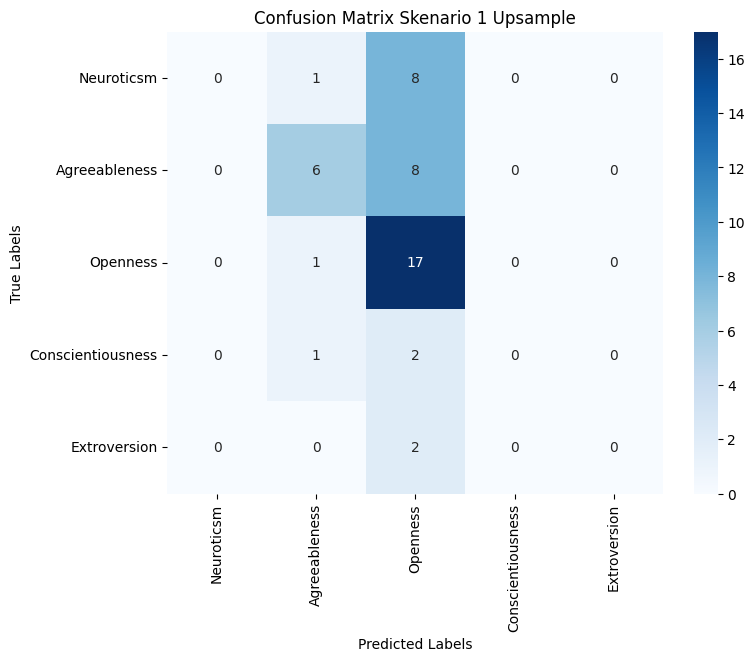


Classification Report Skenario 1 Upsample:
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.6667    0.4286    0.5217        14
         Openness     0.4595    0.9444    0.6182        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5000        46
        macro avg     0.2252    0.2746    0.2280        46
     weighted avg     0.3827    0.5000    0.4007        46

Best Model | Params: {'batch_size': 8, 'learning_rate': 3e-05} | Accuracy: 0.5 | F1 Score: 0.4006874033339061

Results Table:
   learning_rate  batch_size  accuracy  f1_score
0        0.00002           8  0.456522  0.366304
1        0.00003           8  0.500000  0.400687
2        0.00004           8  0.478261  0.393184
3        0.00005           8  0.478261  0.392419
4        0.00002          16  0.413043  0.265252
5 

In [ ]:
# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Define test_labels for evaluation
test_labels = test_data['label'].tolist()
model_name = "indobenchmark/indobert-base-p1"

# Initialize variables for best model
best_accuracy_indobert_scenario1_upsampled = 0
best_f1_indobert_scenario1_upsampled = 0
best_model_indobert_scenario1_upsampled = None
best_params_indobert_scenario1_upsampled = None

# Create a list to store results
results = []

# Grid Hyperparameters
param_grid = {
    'learning_rate': [2e-5, 3e-5, 4e-5, 5e-5],
    'batch_size': [8, 16]
}

# Loop parameter grid
for params in ParameterGrid(param_grid):
    print(f"Parameters: {params}")

    # Initialize model
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, num_labels=len(np.unique(test_labels))
    )

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f"./results/{model_name}",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=params['learning_rate'],
        per_device_train_batch_size=params['batch_size'],
        per_device_eval_batch_size=params['batch_size'],
        num_train_epochs=10,
        weight_decay=0.01,
        logging_dir=f"./logs/{model_name}",
        logging_steps=100,
        save_total_limit=2,
        fp16=True,
        report_to="none",
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        greater_is_better=True,
        logging_first_step=True,
        gradient_accumulation_steps=1
    )

    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
        compute_metrics=lambda p: {
            "accuracy": accuracy_score(p.label_ids, np.argmax(p.predictions, axis=1)),
            "precision": precision_recall_fscore_support(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')[0],
            "recall": precision_recall_fscore_support(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')[1],
            "f1": precision_recall_fscore_support(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')[2]
        }
    )

    # Train model
    trainer.train()

    # Evaluate model
    predictions = trainer.predict(test_dataset)
    predicted_labels = np.argmax(predictions.predictions, axis=1)

    accuracy = accuracy_score(test_labels, predicted_labels)
    f1 = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')[2]

    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"\nClassification Report for Params: {params}")
    print(classification_report(test_labels, predicted_labels, target_names=list(label_mapping.keys()), digits=4))

    # Store results
    results.append({
        'learning_rate': params['learning_rate'],
        'batch_size': params['batch_size'],
        'accuracy': accuracy,
        'f1_score': f1
    })

    # Update best model based on accuracy and F1 score
    if accuracy > best_accuracy_indobert_scenario1_upsampled:
        best_accuracy_indobert_scenario1_upsampled = accuracy
        best_f1_indobert_scenario1_upsampled = f1
        best_model_indobert_scenario1_upsampled = model
        best_params_indobert_scenario1_upsampled = params
        best_predicted_labels_indobert_scenario1_upsampled = predicted_labels

# Confusion Matrix and Evaluation of Best Model
cm = confusion_matrix(test_labels, best_predicted_labels_indobert_scenario1_upsampled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix Skenario 1 Upsample")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("\nClassification Report Skenario 1 Upsample:")
print(classification_report(test_labels, best_predicted_labels_indobert_scenario1_upsampled, target_names=list(label_mapping.keys()), digits=4))

print(f"Best Model | Params: {best_params_indobert_scenario1_upsampled} | Accuracy: {best_accuracy_indobert_scenario1_upsampled} | F1 Score: {best_f1_indobert_scenario1_upsampled}")

# Create a DataFrame from results
results_indobert_scenario1_upsampled = pd.DataFrame(results)

# Display the results table
print("\nResults Table:")
print(results_indobert_scenario1_upsampled)

# Skenario 2 Upsample

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Label distribution in the dataset:
label
Openness             90
Agreeableness        71
Neuroticsm           45
Conscientiousness    17
Extroversion          7
Name: count, dtype: int64


<ipython-input-45-39daaa87506b>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='pastel')


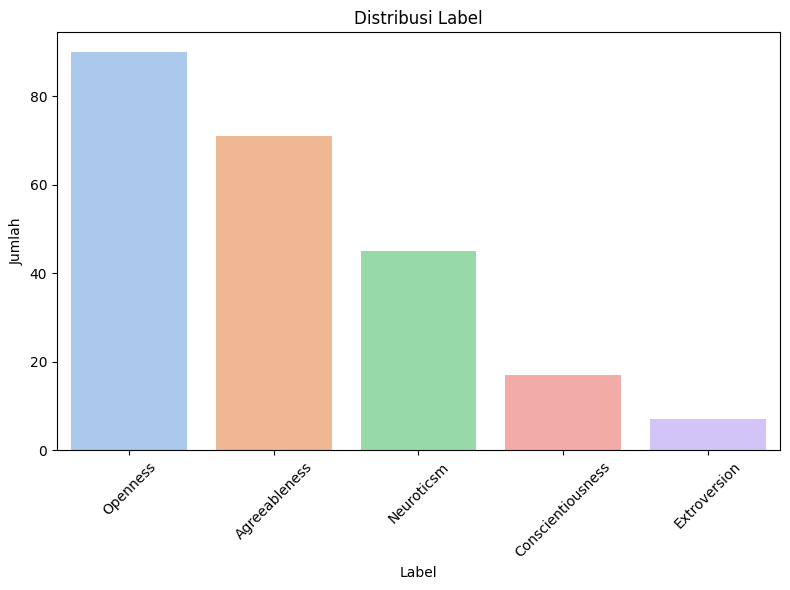

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/My Drive/Dataset TA/skenario_2_final.csv'
data = pd.read_csv(file_path)

data.head()

# Hitung distribusi label
label_distribution = data['label'].value_counts()

# Print label distribution
print("Label distribution in the dataset:")
print(label_distribution)

# Visualisasi distribusi data dalam bentuk bar chart
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='pastel')
plt.title("Distribusi Label")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Create a label mapping
label_mapping = {label: idx for idx, label in enumerate(data['label'].unique())}
data['label'] = data['label'].map(label_mapping)
# Verify the label conversion
print("Label mapping:")
print(label_mapping)
print("Converted label distribution:")
print(data['label'].value_counts())

Label mapping:
{'Neuroticsm': 0, 'Agreeableness': 1, 'Openness': 2, 'Conscientiousness': 3, 'Extroversion': 4}
Converted label distribution:
label
2    90
1    71
0    45
3    17
4     7
Name: count, dtype: int64



Distribusi label sebelum upsampling (Train):
label
2    72
1    57
0    36
3    14
4     5
Name: count, dtype: int64

Distribusi label sebelum upsampling (Test):
label
2    18
1    14
0     9
3     3
4     2
Name: count, dtype: int64

Distribusi label setelah upsampling (Train):
label
0    72
1    72
2    72
3    72
4    72
Name: count, dtype: int64

Distribusi label (Test tetap sama, tidak di-upsample):
label
2    18
1    14
0     9
3     3
4     2
Name: count, dtype: int64


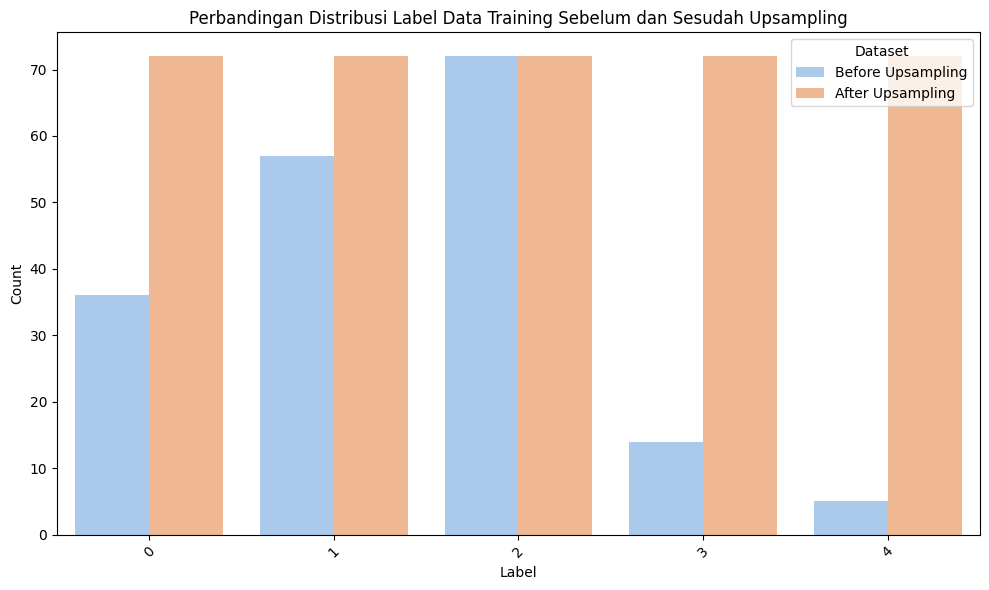

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

# Print initial distribution of train and test data
print("\nDistribusi label sebelum upsampling (Train):")
print(train_data['label'].value_counts())

print("\nDistribusi label sebelum upsampling (Test):")
print(test_data['label'].value_counts())

# Upsample training data
train_data_upsampled = pd.concat([
    resample(group, replace=True, n_samples=train_data['label'].value_counts().max(), random_state=42)
    for label, group in train_data.groupby('label')
])

# Print distribution after upsampling
print("\nDistribusi label setelah upsampling (Train):")
print(train_data_upsampled['label'].value_counts())

print("\nDistribusi label (Test tetap sama, tidak di-upsample):")
print(test_data['label'].value_counts())

# Prepare data for visualization
before_upsampling = train_data['label'].value_counts().sort_index()
after_upsampling = train_data_upsampled['label'].value_counts().sort_index()

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Label': before_upsampling.index,
    'Before Upsampling': before_upsampling.values,
    'After Upsampling': after_upsampling.values
})

# Melt the DataFrame for easier plotting
comparison_df = comparison_df.melt(id_vars='Label', var_name='Dataset', value_name='Count')

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Label', y='Count', hue='Dataset', data=comparison_df, palette='pastel')

# Set title and labels
plt.title("Perbandingan Distribusi Label Data Training Sebelum dan Sesudah Upsampling")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Load the tokenizer for IndoBERT
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

# Prepare text data for tokenization
train_texts = train_data_upsampled['processed_text'].tolist()
test_texts = test_data['processed_text'].tolist()

# Tokenization for IndoBERT
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

# Print the number of tokenized samples
print(f"Jumlah data latih IndoBERT: {len(train_encodings['input_ids'])}")
print(f"Jumlah data uji IndoBERT: {len(test_encodings['input_ids'])}")

# Display examples of tokenized data
print(f"\nContoh data latih :")
print(f"Teks Asli: {train_texts[1]}")
print(f"Token IDs: {train_encodings['input_ids'][1]}")
print(f"Attention Mask: {train_encodings['attention_mask'][1]}")

# Convert token IDs back to tokens
tokens = tokenizer.convert_ids_to_tokens(train_encodings['input_ids'][1])
print(f"Tokens: {tokens}")

# Convert train and test data into separate lists for training and testing
train_labels = train_data_upsampled['label'].tolist()
test_labels = test_data['label'].tolist()

# Optional: Print the first few entries of the processed data
print("\nContoh data latih setelah tokenisasi:")
print(train_encodings['input_ids'][:2])

Jumlah data latih IndoBERT: 360
Jumlah data uji IndoBERT: 46

Contoh data latih :
Teks Asli: tolak legalitas minum keras saynotomiras sayamenolaklegalitasmiras miraspangkalsejutamaksia kroscek tagih obat mundur astagfirullahaladziim newprofilepic kingdomofsiroh btswithkingshifrun ayo warga twitter kelas pastpresentfuture taut daftar tanda raja bahagia gabung circle raja siroh temu teman saleh sholehah mvmaknabahagia engkau mulia cari sahabat orangorang takut allah imam syafii mvmaknabahagia yntv thyn ynentertainment ready second run emot ombak abang hawa pinjam muka mvmaknabahagia yntv thyn ynentertainment abang hawa arah tanda teori emotbingung emotnangis emot akak stream xkwavers debutynentertainment xschool xkwavers maknabahagia thnyn yntv yukngajitv bahagia ombak tim yagak geng emot ombak semangat lupa bahagia mvmaknabahagia yntv thyn ynentertainment favorit video musik makna bahagia mvmaknabahagia yntv thyn ynentertainment mvmaknabahagia yntv thyn ynentertainment emot nangess mvma

In [ ]:
# Create the TweetDataset class
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])  # This should now be an integer
        return item

# Create datasets
train_dataset = TweetDataset(train_encodings, train_data['label'].tolist())
test_dataset = TweetDataset(test_encodings, test_data['label'].tolist())

Parameters: {'batch_size': 8, 'learning_rate': 2e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-50-de4cf565f953>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.663800,1.420410,0.391304,0.153119,0.391304,0.220109
2,1.663800,1.404849,0.304348,0.092628,0.304348,0.142029
3,1.663800,1.400380,0.369565,0.248188,0.369565,0.263268
4,1.663800,1.368992,0.391304,0.303360,0.391304,0.252630
5,1.340200,1.382006,0.456522,0.332274,0.456522,0.378719
6,1.340200,1.383901,0.456522,0.338295,0.456522,0.359993
7,1.340200,1.392419,0.456522,0.423913,0.456522,0.378129
8,1.340200,1.447579,0.391304,0.284302,0.391304,0.329319
9,1.045900,1.523528,0.391304,0.286499,0.391304,0.287676
10,1.045900,1.440459,0.326087,0.241639,0.326087,0.276812


Accuracy: 0.45652173913043476
F1 Score: 0.37871853546910755

Classification Report for Params: {'batch_size': 8, 'learning_rate': 2e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.3846    0.7143    0.5000        14
         Openness     0.5500    0.6111    0.5789        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4565        46
        macro avg     0.1869    0.2651    0.2158        46
     weighted avg     0.3323    0.4565    0.3787        46

Parameters: {'batch_size': 8, 'learning_rate': 3e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-50-de4cf565f953>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.663800,1.407141,0.391304,0.153119,0.391304,0.220109
2,1.663800,1.400348,0.304348,0.092628,0.304348,0.142029
3,1.663800,1.373397,0.391304,0.269336,0.391304,0.317627
4,1.663800,1.369406,0.413043,0.460870,0.413043,0.264182
5,1.353500,1.472386,0.413043,0.308696,0.413043,0.307196
6,1.353500,1.390020,0.413043,0.301790,0.413043,0.336120
7,1.353500,1.400035,0.413043,0.310811,0.413043,0.324111
8,1.353500,1.380021,0.478261,0.342499,0.478261,0.398138
9,1.037100,1.565108,0.369565,0.280376,0.369565,0.277512
10,1.037100,1.416557,0.413043,0.382609,0.413043,0.393328


Accuracy: 0.4782608695652174
F1 Score: 0.398138329209379

Classification Report for Params: {'batch_size': 8, 'learning_rate': 3e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.4545    0.7143    0.5556        14
         Openness     0.5217    0.6667    0.5854        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4783        46
        macro avg     0.1953    0.2762    0.2282        46
     weighted avg     0.3425    0.4783    0.3981        46

Parameters: {'batch_size': 8, 'learning_rate': 4e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-50-de4cf565f953>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.663800,1.404509,0.391304,0.153119,0.391304,0.220109
2,1.663800,1.388428,0.304348,0.092628,0.304348,0.142029
3,1.663800,1.368599,0.391304,0.274443,0.391304,0.276306
4,1.663800,1.485747,0.391304,0.153119,0.391304,0.220109
5,1.356100,1.385814,0.456522,0.345621,0.456522,0.379315
6,1.356100,1.339191,0.500000,0.361679,0.500000,0.404682
7,1.356100,1.328871,0.456522,0.318635,0.456522,0.373549
8,1.356100,1.455057,0.456522,0.316943,0.456522,0.373346
9,1.086300,1.436364,0.391304,0.358243,0.391304,0.342609
10,1.086300,1.382046,0.369565,0.345475,0.369565,0.357018


Accuracy: 0.5
F1 Score: 0.4046822742474916

Classification Report for Params: {'batch_size': 8, 'learning_rate': 4e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.5833    0.5000    0.5385        14
         Openness     0.4706    0.8889    0.6154        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5000        46
        macro avg     0.2108    0.2778    0.2308        46
     weighted avg     0.3617    0.5000    0.4047        46

Parameters: {'batch_size': 8, 'learning_rate': 5e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-50-de4cf565f953>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.663800,1.402758,0.391304,0.153119,0.391304,0.220109
2,1.663800,1.400412,0.304348,0.092628,0.304348,0.142029
3,1.663800,1.384936,0.391304,0.268593,0.391304,0.292631
4,1.663800,1.419991,0.413043,0.460870,0.413043,0.264182
5,1.367500,1.476478,0.304348,0.092628,0.304348,0.142029
6,1.367500,1.610935,0.304348,0.222447,0.304348,0.176092
7,1.367500,1.335423,0.391304,0.272074,0.391304,0.320972
8,1.367500,1.344159,0.391304,0.277174,0.391304,0.318261
9,1.131000,1.397092,0.434783,0.338673,0.434783,0.339545
10,1.131000,1.381762,0.347826,0.287785,0.347826,0.306878


Accuracy: 0.43478260869565216
F1 Score: 0.3395445134575569

Classification Report for Params: {'batch_size': 8, 'learning_rate': 5e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.5714    0.2857    0.3810        14
         Openness     0.4211    0.8889    0.5714        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4348        46
        macro avg     0.1985    0.2349    0.1905        46
     weighted avg     0.3387    0.4348    0.3395        46

Parameters: {'batch_size': 16, 'learning_rate': 2e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-50-de4cf565f953>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.610700,1.424009,0.391304,0.153119,0.391304,0.220109
2,1.610700,1.415995,0.304348,0.092628,0.304348,0.142029
3,1.610700,1.386464,0.391304,0.153119,0.391304,0.220109
4,1.610700,1.380467,0.326087,0.194486,0.326087,0.217740
5,1.610700,1.416525,0.304348,0.245599,0.304348,0.200859
6,1.610700,1.407704,0.413043,0.460870,0.413043,0.264182
7,1.610700,1.411589,0.347826,0.204030,0.347826,0.231005
8,1.610700,1.418255,0.478261,0.332609,0.478261,0.392351
9,1.306800,1.416536,0.369565,0.248188,0.369565,0.263268
10,1.306800,1.411908,0.391304,0.273913,0.391304,0.304348


Accuracy: 0.4782608695652174
F1 Score: 0.39235061613578237

Classification Report for Params: {'batch_size': 16, 'learning_rate': 2e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.4500    0.6429    0.5294        14
         Openness     0.5000    0.7222    0.5909        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4783        46
        macro avg     0.1900    0.2730    0.2241        46
     weighted avg     0.3326    0.4783    0.3924        46

Parameters: {'batch_size': 16, 'learning_rate': 3e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-50-de4cf565f953>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.610700,1.397344,0.391304,0.153119,0.391304,0.220109
2,1.610700,1.390253,0.304348,0.092628,0.304348,0.142029
3,1.610700,1.375159,0.391304,0.153119,0.391304,0.220109
4,1.610700,1.386347,0.413043,0.460870,0.413043,0.264182
5,1.610700,1.462816,0.326087,0.352882,0.326087,0.213359
6,1.610700,1.427915,0.391304,0.256151,0.391304,0.253910
7,1.610700,1.469100,0.413043,0.299647,0.413043,0.314625
8,1.610700,1.523682,0.369565,0.275696,0.369565,0.295531
9,1.264300,1.512218,0.434783,0.319876,0.434783,0.348305
10,1.264300,1.500924,0.413043,0.293478,0.413043,0.342857


Accuracy: 0.43478260869565216
F1 Score: 0.3483046212742686

Classification Report for Params: {'batch_size': 16, 'learning_rate': 3e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.5000    0.3571    0.4167        14
         Openness     0.4286    0.8333    0.5660        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4348        46
        macro avg     0.1857    0.2381    0.1965        46
     weighted avg     0.3199    0.4348    0.3483        46

Parameters: {'batch_size': 16, 'learning_rate': 4e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-50-de4cf565f953>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.610700,1.387939,0.391304,0.153119,0.391304,0.220109
2,1.610700,1.396803,0.304348,0.092628,0.304348,0.142029
3,1.610700,1.374713,0.391304,0.153119,0.391304,0.220109
4,1.610700,1.381963,0.413043,0.460870,0.413043,0.264182
5,1.610700,1.431842,0.347826,0.241966,0.347826,0.284314
6,1.610700,1.370404,0.434783,0.306042,0.434783,0.343232
7,1.610700,1.466494,0.413043,0.293478,0.413043,0.342857
8,1.610700,1.514627,0.369565,0.268314,0.369565,0.288546
9,1.260300,1.508901,0.434783,0.324808,0.434783,0.352564
10,1.260300,1.499459,0.369565,0.276087,0.369565,0.301713


Accuracy: 0.43478260869565216
F1 Score: 0.3432321575061526

Classification Report for Params: {'batch_size': 16, 'learning_rate': 4e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.4545    0.3571    0.4000        14
         Openness     0.4286    0.8333    0.5660        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4348        46
        macro avg     0.1766    0.2381    0.1932        46
     weighted avg     0.3060    0.4348    0.3432        46

Parameters: {'batch_size': 16, 'learning_rate': 5e-05}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-50-de4cf565f953>:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.610700,1.389670,0.391304,0.153119,0.391304,0.220109
2,1.610700,1.397450,0.304348,0.092628,0.304348,0.142029
3,1.610700,1.372399,0.391304,0.153119,0.391304,0.220109
4,1.610700,1.377473,0.413043,0.460870,0.413043,0.264182
5,1.610700,1.392620,0.391304,0.272084,0.391304,0.320298
6,1.610700,1.376274,0.434783,0.334448,0.434783,0.335622
7,1.610700,1.445350,0.413043,0.300421,0.413043,0.328327
8,1.610700,1.527832,0.413043,0.356693,0.413043,0.314381
9,1.266700,1.490062,0.413043,0.411125,0.413043,0.356947
10,1.266700,1.488918,0.347826,0.321880,0.347826,0.330171


Accuracy: 0.43478260869565216
F1 Score: 0.3356216628527841

Classification Report for Params: {'batch_size': 16, 'learning_rate': 5e-05}
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.5714    0.2857    0.3810        14
         Openness     0.4103    0.8889    0.5614        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.4348        46
        macro avg     0.1963    0.2349    0.1885        46
     weighted avg     0.3344    0.4348    0.3356        46



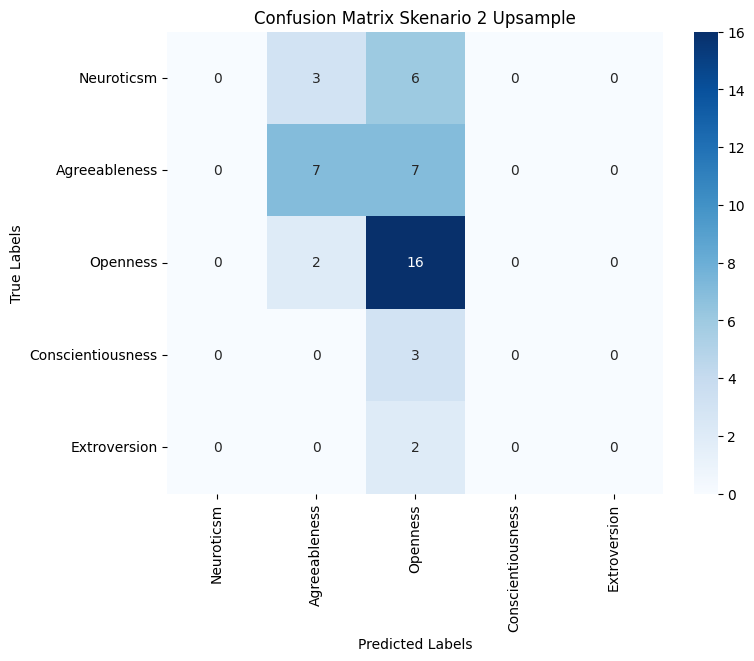


Classification Report Skenario 2 Upsample:
                   precision    recall  f1-score   support

       Neuroticsm     0.0000    0.0000    0.0000         9
    Agreeableness     0.5833    0.5000    0.5385        14
         Openness     0.4706    0.8889    0.6154        18
Conscientiousness     0.0000    0.0000    0.0000         3
     Extroversion     0.0000    0.0000    0.0000         2

         accuracy                         0.5000        46
        macro avg     0.2108    0.2778    0.2308        46
     weighted avg     0.3617    0.5000    0.4047        46

Best Model | Params: {'batch_size': 8, 'learning_rate': 4e-05} | Accuracy: 0.5 | F1 Score: 0.4046822742474916

Results Table:
   learning_rate  batch_size  accuracy  f1_score
0        0.00002           8  0.456522  0.378719
1        0.00003           8  0.478261  0.398138
2        0.00004           8  0.500000  0.404682
3        0.00005           8  0.434783  0.339545
4        0.00002          16  0.478261  0.392351
5 

In [ ]:
# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Define test_labels for evaluation
test_labels = test_data['label'].tolist()
model_name = "indobenchmark/indobert-base-p1"

# Initialize variables for best model
best_accuracy_indobert_scenario2_upsampled = 0
best_f1_indobert_scenario2_upsampled = 0
best_model_indobert_scenario2_upsampled = None
best_params_indobert_scenario2_upsampled = None

# Create a list to store results
results = []

# Grid Hyperparameters
param_grid = {
    'learning_rate': [2e-5, 3e-5, 4e-5, 5e-5],
    'batch_size': [8, 16]
}

# Loop parameter grid
for params in ParameterGrid(param_grid):
    print(f"Parameters: {params}")

    # Initialize model
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, num_labels=len(np.unique(test_labels))
    )

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f"./results/{model_name}",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=params['learning_rate'],
        per_device_train_batch_size=params['batch_size'],
        per_device_eval_batch_size=params['batch_size'],
        num_train_epochs=10,
        weight_decay=0.01,
        logging_dir=f"./logs/{model_name}",
        logging_steps=100,
        save_total_limit=2,
        fp16=True,
        report_to="none",
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        greater_is_better=True,
        logging_first_step=True,
        gradient_accumulation_steps=1
    )

    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
        compute_metrics=lambda p: {
            "accuracy": accuracy_score(p.label_ids, np.argmax(p.predictions, axis=1)),
            "precision": precision_recall_fscore_support(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')[0],
            "recall": precision_recall_fscore_support(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')[1],
            "f1": precision_recall_fscore_support(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')[2]
        }
    )

    # Train model
    trainer.train()

    # Evaluate model
    predictions = trainer.predict(test_dataset)
    predicted_labels = np.argmax(predictions.predictions, axis=1)

    accuracy = accuracy_score(test_labels, predicted_labels)
    f1 = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')[2]

    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"\nClassification Report for Params: {params}")
    print(classification_report(test_labels, predicted_labels, target_names=list(label_mapping.keys()), digits=4))

    # Store results
    results.append({
        'learning_rate': params['learning_rate'],
        'batch_size': params['batch_size'],
        'accuracy': accuracy,
        'f1_score': f1
    })

    # Update best model based on accuracy and F1 score
    if accuracy > best_accuracy_indobert_scenario2_upsampled:
        best_accuracy_indobert_scenario2_upsampled = accuracy
        best_f1_indobert_scenario2_upsampled = f1
        best_model_indobert_scenario2_upsampled = model
        best_params_indobert_scenario2_upsampled = params
        best_predicted_labels_indobert_scenario2_upsampled = predicted_labels

# Confusion Matrix and Evaluation of Best Model
cm = confusion_matrix(test_labels, best_predicted_labels_indobert_scenario2_upsampled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix Skenario 2 Upsample")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("\nClassification Report Skenario 2 Upsample:")
print(classification_report(test_labels, best_predicted_labels_indobert_scenario2_upsampled, target_names=list(label_mapping.keys()), digits=4))

print(f"Best Model | Params: {best_params_indobert_scenario2_upsampled} | Accuracy: {best_accuracy_indobert_scenario2_upsampled} | F1 Score: {best_f1_indobert_scenario2_upsampled}")

# Create a DataFrame from results
results_indobert_scenario2_upsampled = pd.DataFrame(results)

# Display the results table
print("\nResults Table:")
print(results_indobert_scenario2_upsampled)

# Visualisasi Data Perbandingan

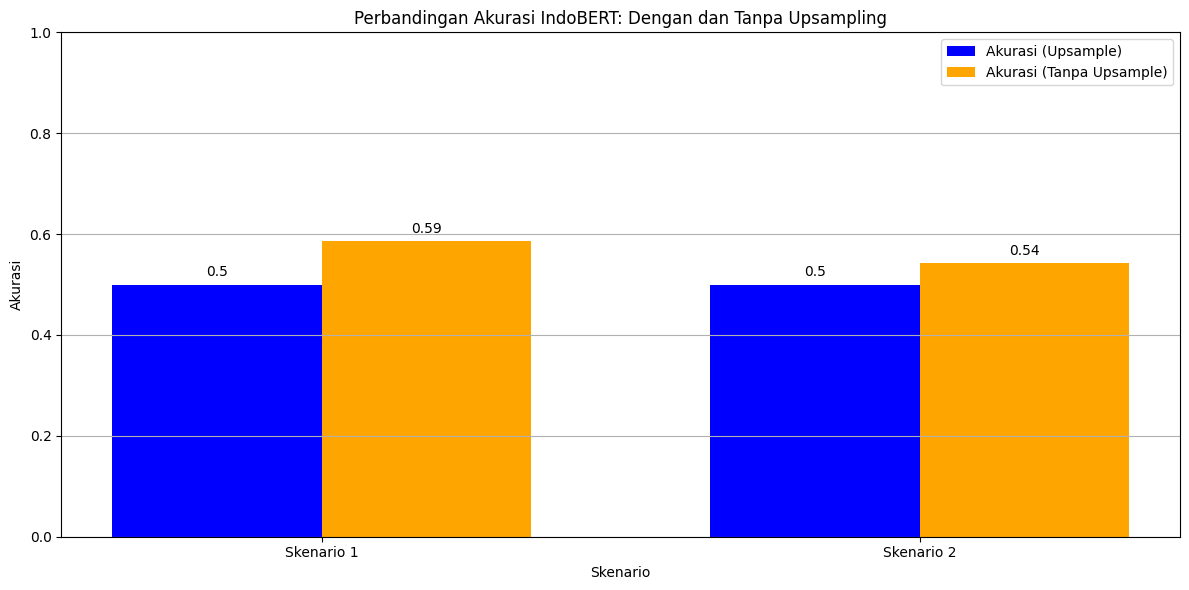

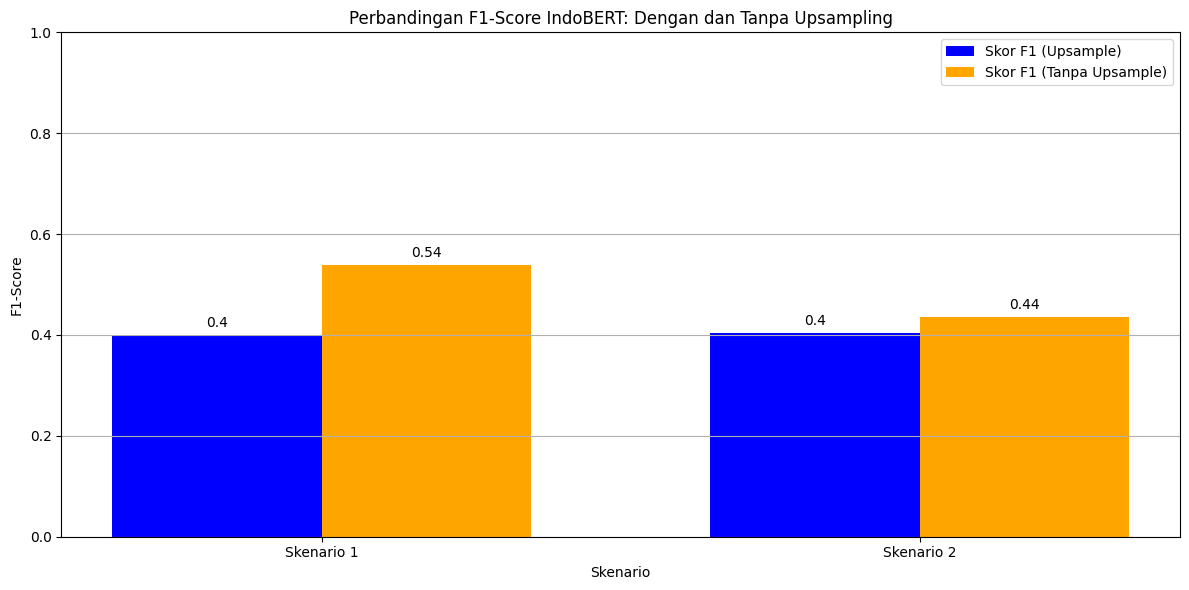

In [ ]:
indobert_comparison_upsampled = pd.DataFrame({
    'Scenario': ['Skenario 1', 'Skenario 2'],
    'Akurasi': [best_accuracy_indobert_scenario1_upsampled, best_accuracy_indobert_scenario2_upsampled],
    'Skor F1': [best_f1_indobert_scenario1_upsampled, best_f1_indobert_scenario2_upsampled]
})

indobert_comparison_noup = pd.DataFrame({
    'Scenario': ['Skenario 1', 'Skenario 2'],
    'Akurasi': [best_accuracy_indobert_scenario1, best_accuracy_indobert_scenario2],
    'Skor F1': [best_f1_indobert_scenario1, best_f1_indobert_scenario2]
})

# Plotting Akurasi for IndoBERT with and without upsampling
plt.figure(figsize=(12, 6))

# Set posisi batang
bar_width = 0.35  # Lebar batang
index = range(len(indobert_comparison_upsampled['Scenario']))  # Indeks untuk skenario

# Plot Akurasi with upsampling
bars_accuracy_upsampled = plt.bar(index, indobert_comparison_upsampled['Akurasi'], bar_width, color='blue', label='Akurasi (Upsample)')

# Plot Akurasi without upsampling
bars_accuracy_noup = plt.bar([i + bar_width for i in index], indobert_comparison_noup['Akurasi'], bar_width, color='orange', label='Akurasi (Tanpa Upsample)')

# Set label dan judul
plt.xlabel('Skenario')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi IndoBERT: Dengan dan Tanpa Upsampling')
plt.xticks([i + bar_width / 2 for i in index], indobert_comparison_upsampled['Scenario'])  # Set label skenario
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend()

# Tambahkan angka di atas batang akurasi
for bar in bars_accuracy_upsampled + bars_accuracy_noup:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plotting Skor F1 for IndoBERT with and without upsampling
plt.figure(figsize=(12, 6))

# Plot Skor F1 with upsampling
bars_f1_upsampled = plt.bar(index, indobert_comparison_upsampled['Skor F1'], bar_width, color='blue', label='Skor F1 (Upsample)')

# Plot Skor F1 without upsampling
bars_f1_noup = plt.bar([i + bar_width for i in index], indobert_comparison_noup['Skor F1'], bar_width, color='orange', label='Skor F1 (Tanpa Upsample)')

# Set label dan judul
plt.xlabel('Skenario')
plt.ylabel('F1-Score')
plt.title('Perbandingan F1-Score IndoBERT: Dengan dan Tanpa Upsampling')
plt.xticks([i + bar_width / 2 for i in index], indobert_comparison_upsampled['Scenario'])  # Set label skenario
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend()

# Tambahkan angka di atas batang Skor F1
for bar in bars_f1_upsampled + bars_f1_noup:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()
